In [1]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf

In [3]:
ethereum = yf.download("ETH-USD", start = "2014-01-01", end = "2023-11-21")

[*********************100%%**********************]  1 of 1 completed


In [4]:
ethereum

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2023-11-16,2059.965820,2088.662354,1940.574219,1960.881592,1960.881592,14651619483
2023-11-17,1961.867554,1990.050537,1910.445435,1961.280762,1961.280762,11881648738
2023-11-18,1961.671265,1971.462280,1921.062378,1963.285034,1963.285034,8064677046


In [5]:
ethereum.shape

(2203, 6)

In [6]:
ethereum.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [7]:
ethereum.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-16,2059.965820,2088.662354,1940.574219,1960.881592,1960.881592,14651619483
2023-11-17,1961.867554,1990.050537,1910.445435,1961.280762,1961.280762,11881648738
2023-11-18,1961.671265,1971.462280,1921.062378,1963.285034,1963.285034,8064677046
2023-11-19,1963.180054,2015.633911,1944.900879,2013.204468,2013.204468,7716048818
2023-11-20,2011.853394,2066.409912,1996.044312,2022.239136,2022.239136,12866464824


In [8]:
ethereum.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2203 entries, 2017-11-09 to 2023-11-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2203 non-null   float64
 1   High       2203 non-null   float64
 2   Low        2203 non-null   float64
 3   Close      2203 non-null   float64
 4   Adj Close  2203 non-null   float64
 5   Volume     2203 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 120.5 KB


In [9]:
ethereum.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2.203000e+03
mean,1219.467795,1254.769400,1180.261491,1220.041487,1220.041487,1.205951e+10
std,1120.636851,1153.099650,1083.568504,1120.183125,1120.183125,1.023804e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,6.217330e+08
25%,229.104347,234.079506,224.370499,229.096664,229.096664,4.663177e+09
50%,856.012024,880.392029,817.507996,856.853027,856.853027,9.293964e+09
75%,1839.110718,1869.568604,1804.361206,1839.752686,1839.752686,1.670048e+10
max,4810.071289,4891.704590,4718.039062,4812.087402,4812.087402,8.448291e+10


#Closing Price
The closing price is the last price at which a security traded during the regular trading day

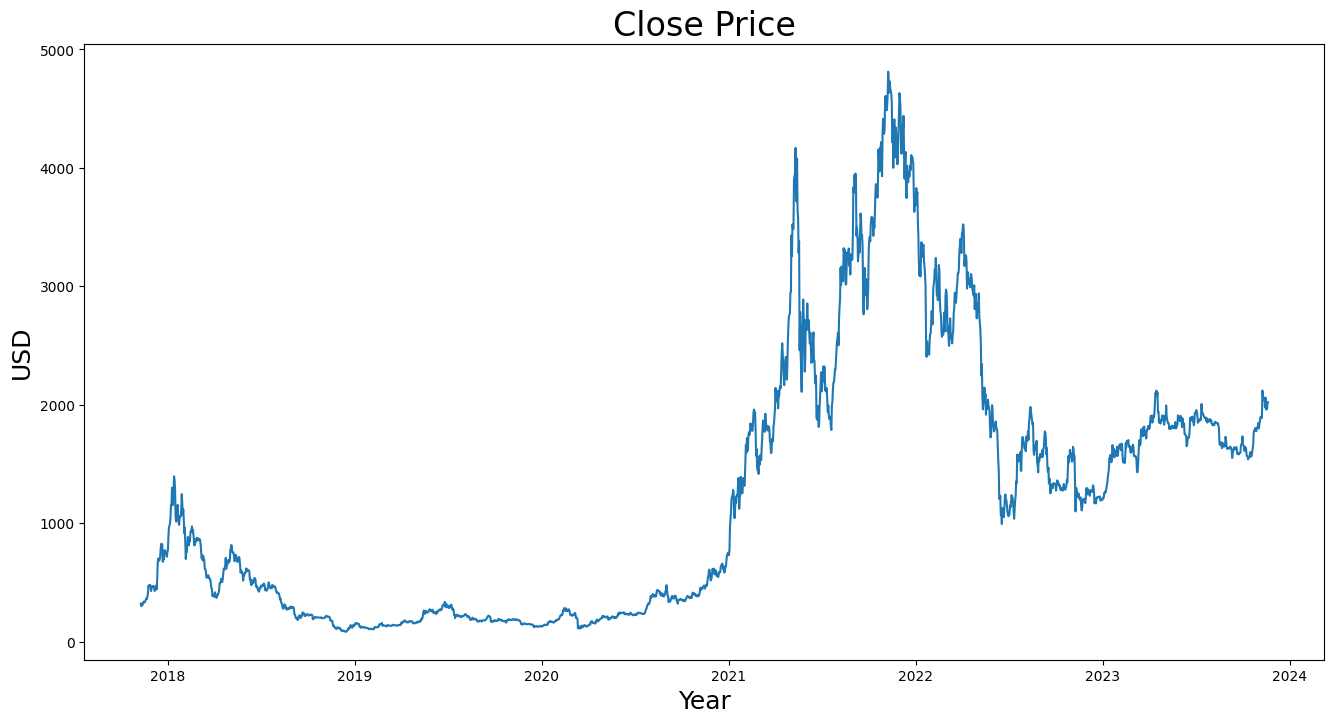

In [10]:
plt.figure(figsize=(16,8))
plt.title('Close Price', fontsize=24)
plt.plot(ethereum['Close'])
plt.xlabel('Year', fontsize=18)
plt.ylabel('USD', fontsize=18)
plt.show()

#Checking for Null values

In [11]:
print('Null Values:',ethereum.isnull().values.sum())

Null Values: 0


In [12]:
print('NA values:',ethereum.isnull().values.any())

NA values: False


In [13]:
# Final shape of the dataset after dealing with null values

ethereum.shape

(2203, 6)

In [14]:
#Creat a new dataframe with only Close Price
data = ethereum.filter(['Close'])
#Convert the dataframe to numpy array
dataset = data.values
# Get the number of rows to train the model on. we need this number to create our train and test sets
# math.ceil will round up the number
training_data_len = math.ceil(len(dataset) * .8) # We are using %80 of the data for training
training_data_len

1763

In [15]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0500395 ],
       [0.0454642 ],
       [0.04872747],
       ...,
       [0.39743328],
       [0.40799203],
       [0.409903  ]])

In [16]:
# Creat the training dataset
train_data = scaled_data[0:training_data_len, :]
# Split the data into X_train and y_train data sets
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60: i, 0])
  y_train.append(train_data[i, 0])


  if i <= 60:
    print(X_train)
    print(y_train)
    print()

[array([0.0500395 , 0.0454642 , 0.04872747, 0.04729487, 0.0491579 ,
       0.05358176, 0.05267774, 0.05216312, 0.05247405, 0.05569289,
       0.0571257 , 0.05973666, 0.05839797, 0.06268138, 0.06892405,
       0.08261865, 0.08079221, 0.0818612 , 0.08377014, 0.08219371,
       0.07259534, 0.07673914, 0.08084805, 0.08019425, 0.08070273,
       0.08162304, 0.08015872, 0.0728206 , 0.07405162, 0.07862523,
       0.08232062, 0.07559844, 0.09112687, 0.11995542, 0.1308138 ,
       0.12934354, 0.12693903, 0.12942667, 0.13445355, 0.15024744,
       0.15705359, 0.1554171 , 0.15583526, 0.12491102, 0.13432919,
       0.12899074, 0.14415345, 0.14584601, 0.1435206 , 0.13805948,
       0.14156408, 0.13387866, 0.14222845, 0.14559324, 0.16924134,
       0.18579795, 0.18964797, 0.193201  , 0.20249926, 0.22608115])]
[0.22509971578645008]



In [17]:
len(X_train)

1703

In [18]:
# Convert the X_train and y_train to numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

In [19]:
X_train.shape

(1703, 60)

In [20]:
# Reshape the data because LSTM needs 3 dim
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # we make it like pros. it wanna say "np.reshape(X_train, (2083, 60, 1))"
X_train.shape

(1703, 60, 1)

In [21]:
# Create the testing dataset
# Create a new array containing scaled values from index 2083
test_data = scaled_data[training_data_len - 60 : , :]

#Create the data sets X_test and y_test
X_test = []
y_test = dataset[training_data_len : , :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60 : i, 0])

In [22]:
# Convert the data to a numpy array
X_test = np.array(X_test)

In [23]:
# Reshape the test data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [24]:
# Build LSTM model
tf.random.set_seed(42)

model_1 = Sequential()
model_1.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # we made it like pros ;) , the simple form is "input_shape(60, 1)""
model_1.add(LSTM(50, return_sequences=False))
model_1.add(Dense(25))
model_1.add(Dense(1))

In [25]:
# Compile the model
model_1.compile(optimizer='adam', loss='mse')

In [26]:
# Train the model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model_1.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1703/1703 [==============================] - 71s 36ms/step - loss: 0.0026
Epoch 2/10
1703/1703 [==============================] - 55s 32ms/step - loss: 0.0011
Epoch 3/10
1703/1703 [==============================] - 54s 32ms/step - loss: 7.6427e-04
Epoch 4/10
1703/1703 [==============================] - 52s 31ms/step - loss: 8.0001e-04
Epoch 5/10
1703/1703 [==============================] - 54s 32ms/step - loss: 6.0419e-04
Epoch 6/10
1703/1703 [==============================] - 53s 31ms/step - loss: 6.6087e-04
Epoch 7/10
1703/1703 [==============================] - 55s 33ms/step - loss: 5.7177e-04
Epoch 8/10
1703/1703 [==============================] - 54s 32ms/step - loss: 5.1445e-04
Epoch 9/10
1703/1703 [==============================] - 52s 31ms/step - loss: 5.3106e-04
Epoch 10/10
1703/1703 [==============================] - 54s 32ms/step - loss: 5.0170e-04


In [27]:
# Get the model_1 predicted price values
predictions_1 = model_1.predict(X_test)
predictions_1 = scaler.inverse_transform(predictions_1)
len(predictions_1)

14/14 [==============================] - 1s 16ms/step


440

In [28]:
# Get the root mean squared error (RMSE) for model_1
rmse = np.sqrt(np.mean(predictions_1 - y_test)**2)
rmse

81.40521517666903

Text(0.5, 0, 'epochs')

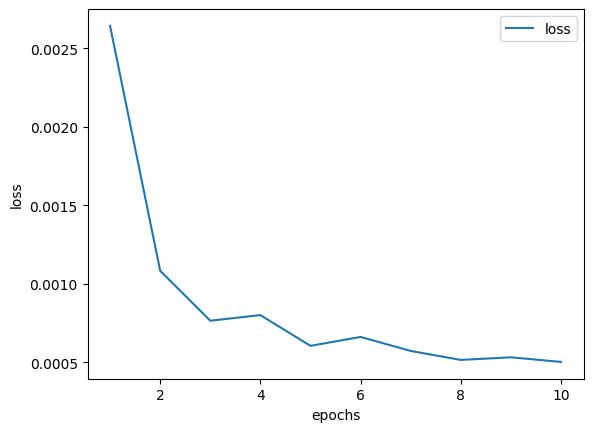

In [29]:
# Let's plot the history of model_1 and see what's going on
historyForPlot = pd.DataFrame(history.history)
historyForPlot.index += 1 # we plus 1 to the number of indexing so our epochs Plot picture will be counting from 1 not 0.
historyForPlot.plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [30]:
# Train the model again with 7 epochs
# but first we need to create another model so we can compare them together

# building LSTM model_2
tf.random.set_seed(42)

model_2 = Sequential()
model_2.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # we made it like pros ;) | the simple form is "input_shape(60, 1)
model_2.add(LSTM(50, return_sequences=False))
model_2.add(Dense(25))
model_2.add(Dense(1))

# Compile model_2
model_2.compile(optimizer='Adam', loss='mse')

# Fit model_2
history_2 = model_2.fit(X_train, y_train, batch_size=1, epochs=6)

Epoch 1/6
1703/1703 [==============================] - 60s 33ms/step - loss: 0.0024
Epoch 2/6
1703/1703 [==============================] - 54s 32ms/step - loss: 0.0010
Epoch 3/6
1703/1703 [==============================] - 54s 31ms/step - loss: 7.8462e-04
Epoch 4/6
1703/1703 [==============================] - 54s 32ms/step - loss: 8.4138e-04
Epoch 5/6
1703/1703 [==============================] - 55s 32ms/step - loss: 6.1210e-04
Epoch 6/6
1703/1703 [==============================] - 55s 32ms/step - loss: 6.7664e-04


In [31]:
# Get the model_2 predicted price values
predictions_2 = model_2.predict(X_test)
predictions_2 = scaler.inverse_transform(predictions_2)
len(predictions_2)

14/14 [==============================] - 1s 16ms/step


440

In [32]:
# Get the root mean squared error (RMSE) for model_2
rmse_2 = np.sqrt(np.mean(predictions_2 - y_test)**2)
rmse_2

29.837618186257103

<ipython-input-33-3dc8d231f6cd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_1['Predictions'] = predictions_1
<ipython-input-33-3dc8d231f6cd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_2['Predictions'] = predictions_2


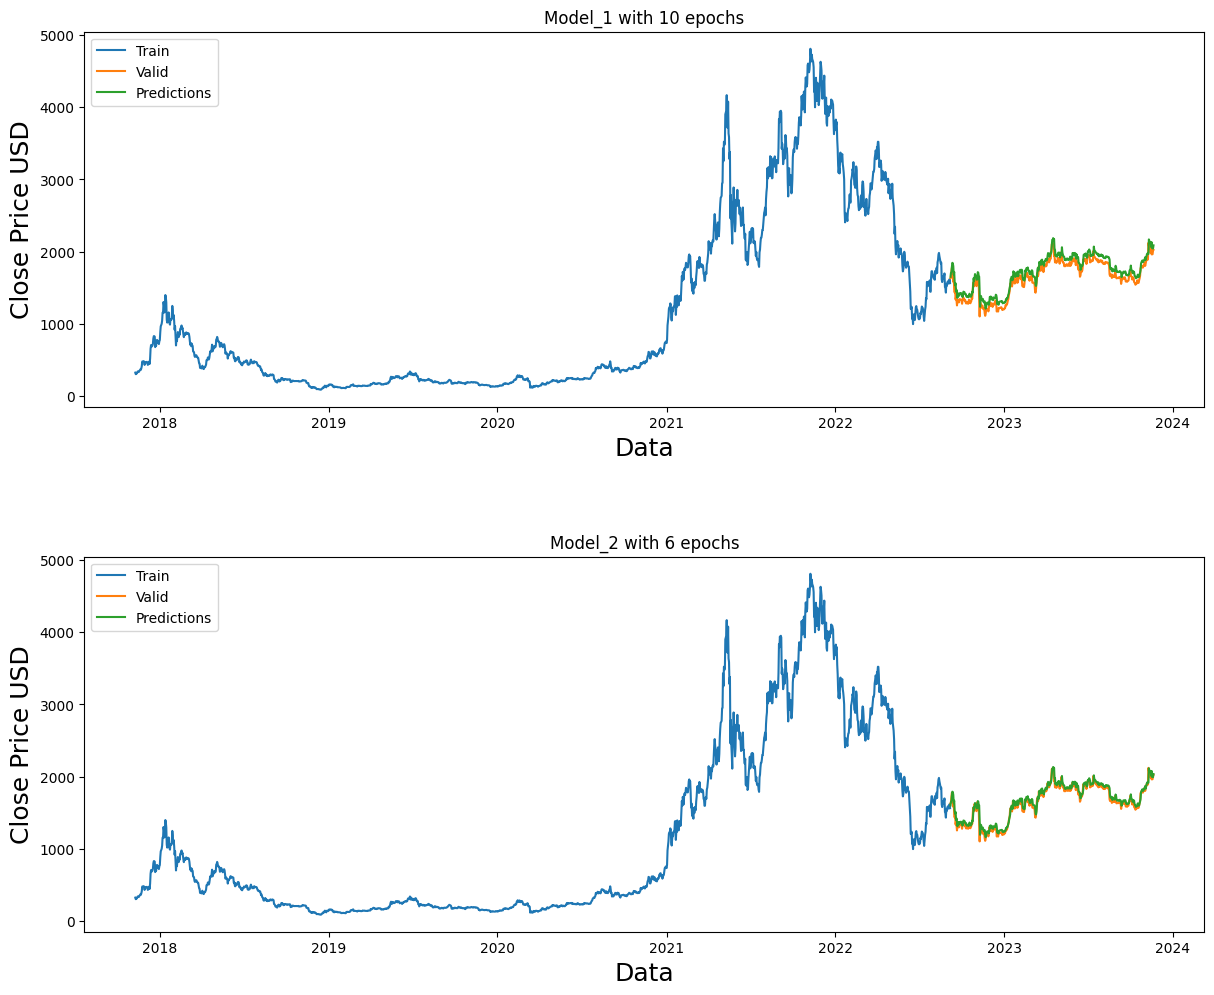

In [33]:
# Plot the data
train = data[:training_data_len]

#data for model_1
valid_1 = data[training_data_len:]
valid_1['Predictions'] = predictions_1

# data for model_2
valid_2 = data[training_data_len:]
valid_2['Predictions'] = predictions_2

# Visualized the data
#model_1
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.title('Model_1 with 10 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_1[['Close', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')

#model_2
plt.subplot(2, 1, 2)
plt.title('Model_2 with 6 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_2[['Close', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

In [34]:

#Get the last 60 day closing price values and convert the datadrame to an array
last_60_days = data[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.fit_transform(last_60_days)
# create an empty list
new_X_test = []
# Append the past 60 days
new_X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
new_X_test = np.array(new_X_test)
# Reshape the data
new_X_test = np.reshape(new_X_test, (new_X_test.shape[0], new_X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model_1.predict(new_X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


1/1 [==============================] - 0s 261ms/step
[[2020.1787]]


In [35]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalle

In [36]:
model_1.save('model_ETH.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
from google.colab import files
files.download('model_ETH.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>